<h2>Load the data </h2>

In [95]:
import numpy as np
import pandas as pd
pd.set_option('html',False)

In [96]:
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

train_x = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_x_train.txt'
train_y = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_y_train.txt'
train_z = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_z_train.txt'
train_l = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/y_train.txt'

df_x = pd.read_csv(train_x, header=None, sep='\s+')
df_y = pd.read_csv(train_y, header=None, sep='\s+')
df_z = pd.read_csv(train_z, header=None, sep='\s+')
df_l = pd.read_csv(train_l, header=None, sep='\s+')

<h3>Data description</h3>
<p>1 WALKING</p>
<p>2 WALKING_UPSTAIRS</p>
<p>3 WALKING_DOWNSTAIRS</p>
<p>4 SITTING</p>
<p>5 STANDING</p>
<p>6 LAYING</p>

<h3> From standing(instance 23) to sitting(instance 32).</h3>

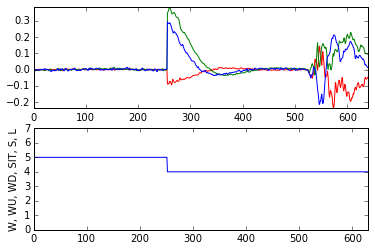

In [112]:
#Since the data we have is already overlapping with 50%, we have to split this up. 
df_x = df_x.ix[:,0:63]

start_instance = 23
stop_instance = 33

def plotRawDataBetweenInstances(start, stop, df_x, df_y, df_z):    
    df_x_list = []
    df_y_list = []
    df_z_list = []
    
    for i in range(start,stop):
        for j in range(0,len(df_x.iloc[i].values)):
            df_x_list.append(df_x.iloc[i].values[j])
            df_y_list.append(df_y.iloc[i].values[j])
            df_z_list.append(df_z.iloc[i].values[j])

    plt.subplot(2,1,1)
    plt.plot(range(len(df_x_list)), df_x_list, c="r")
    plt.plot(range(len(df_y_list)), df_y_list, c="g")
    plt.plot(range(len(df_z_list)), df_z_list, c="b")
    
    min_y = min([min(df_x_list),min(df_y_list),min(df_z_list)])
    max_y = max([max(df_x_list),max(df_y_list),max(df_z_list)])
    
    plt.axis([0, len(df_x_list), min_y,max_y])
    
    
    df_l_list = []
    for i in range(start, stop):
        for j in range(0,63):
            df_l_list.append(df_l.iloc[i])
        
        
    
    plt.subplot(2,1,2)
    plt.plot(range(len(df_l_list)), df_l_list)
    plt.axis([0, len(df_l_list), 0,7])
    plt.ylabel('W, WU, WD, SIT, S, L')
    
    plt.show()
    
plotRawDataBetweenInstances(start_instance, stop_instance, df_x, df_y, df_z) 

<h3>

<h3> From sitting(instance 47) to laying(instance 56).</h3>

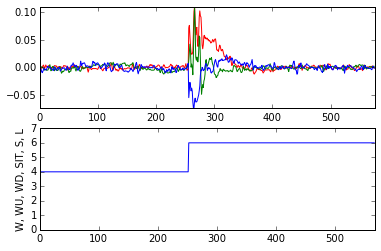

In [98]:
plotRawDataBetweenInstances(47, 56, df_x, df_y, df_z) 

<h3> From laying(instance 74) to walking(instance 83).</h3>

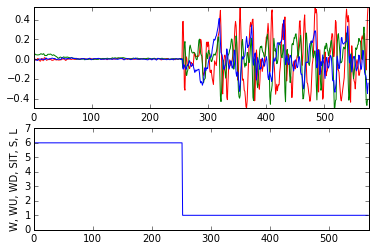

In [99]:
plotRawDataBetweenInstances(74, 83, df_x, df_y, df_z) 

<h3>From instance 0 to instance 1000</h3>

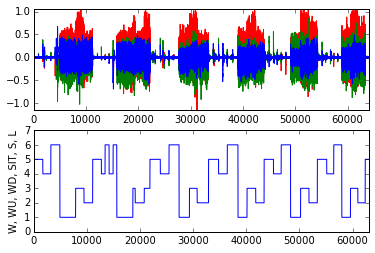

In [100]:
plotRawDataBetweenInstances(0, 1000, df_x, df_y, df_z) 